In [2]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 1D Velocity-jump process
Suppose the position of a random walker is given by $X(t)$. The random walker moves with a constant velocity, and the velocity switches randomly between $v = \pm r$. That is,
$$ \dot{X} = v(N(t)), \quad v(N) = Nr,$$
where $N(t)$ is a two state Markov process (like the traffic light) that takes values of either $\{-1, 1\}$.
The transitions between the two states are as follows
$$ (N=-1) {{\alpha \atop\longrightarrow}\atop{\longleftarrow\atop \beta}} (N=1). $$

The 1D velocity-jump process is unbiased if $\alpha = \beta$. To see this, consider the average velocity given by
$$ E[v(N(t))] = \sum_{n=\{-1, 1\}} v(n)p(n, t)= v(-1)p(-1, t) + v(1)p(1, t) = (-r)\cdot p(-1, t) + rp(1, t).$$
The process is unbiased if 
$$\lim_{t\to\infty}E[v(N(t))] = 0,$$
which implies that
$$\lim_{t\to\infty}(-rp(-1, t) + rp(1, t)) = r\lim_{t\to\infty}(-p(-1, t) + p(1, t)) = 0.$$

The distribution $p(n, t)$ can be written as a vector with
$$ {\bf p}(t) = 
\begin{bmatrix}
p(-1, t) \\
p(1, t)
\end{bmatrix},
$$
It satisfies the Master equation given by
$$
\frac{d{\bf p}}{dt} = 
\begin{bmatrix}
-\alpha & \beta \\
\alpha & -\beta
\end{bmatrix}
{\bf p}.
$$
Let the stationary distribution be
$$ \lim_{t\to\infty}{\bf p}(t) = \rho.
$$
where
$$ \rho 
=
\begin{bmatrix}
\rho(-1) \\
\rho(1)
\end{bmatrix}
=
\begin{bmatrix}
\frac{\beta}{\alpha + \beta} \\
\frac{\alpha}{\alpha + \beta}
\end{bmatrix}.
$$
You can confirm this by checking that $A\rho = 0$.
As $t \to \infty$, the total fraction of time moving right is $\rho(1) = \frac{\alpha}{\alpha + \beta}$.
It follows that the fraction of time moving left is $1-\rho(1) = \rho(-1) = \frac{\beta}{\alpha + \beta}$.
The process is unbiased if $\rho(-1) = \rho(1) = 1/2$ which is true if and only if $\alpha = \beta$.



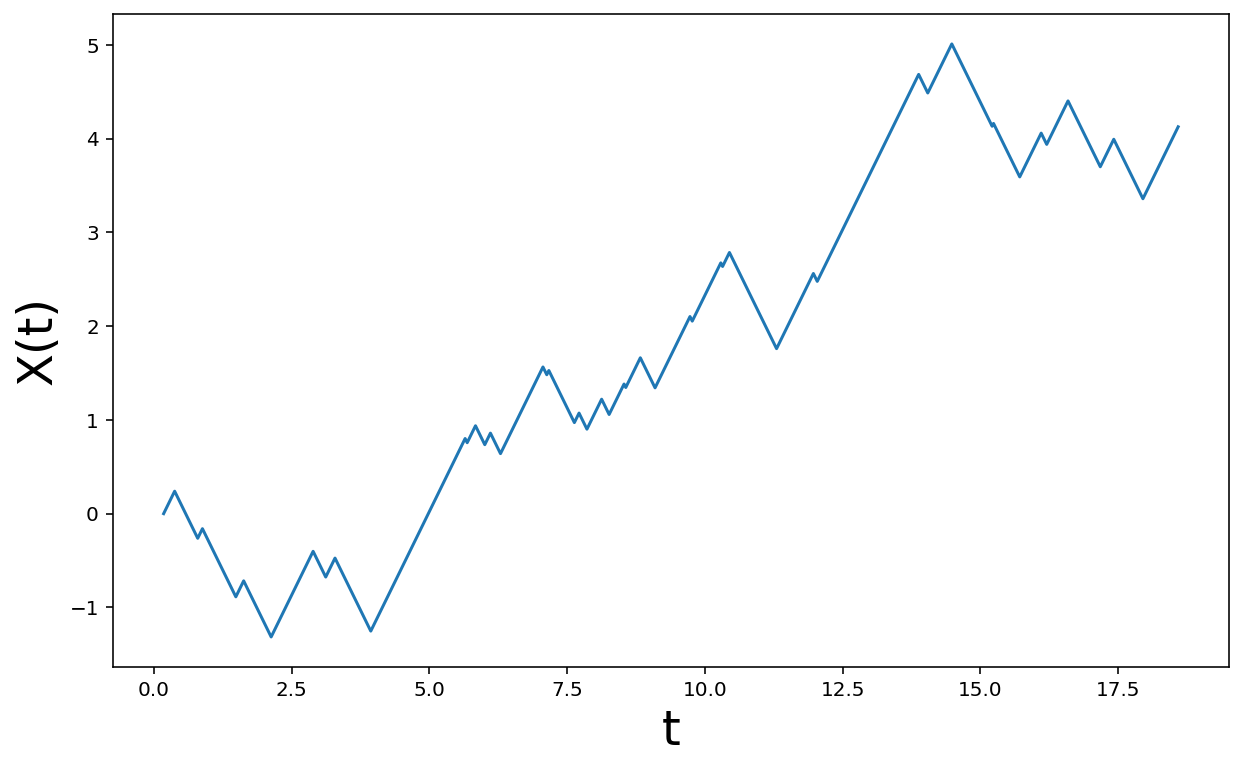

In [5]:
r = 1.2
alpha = 2.
beta = 2.
n0 = -1 ## must be -1 or 1
x0 = 0.
Nsteps = 50
T = zeros(Nsteps)
T[0] = 0
N = zeros(Nsteps)
N[0] = n0
X = zeros(Nsteps)
X[0] = x0
for j in arange(Nsteps): ## compute the rate using if statement
    n = N[j-1]
    u = rand(1)[0]
    if n == 1: 
        rate = beta
    else:
        rate = alpha
    tau = -log(u)/rate
    T[j] = T[j-1] + tau ## t += tau is the same as t = t + tau
    X[j] = X[j-1] + tau*(n*r) ## X(t + tau) = X(t) + tau*v(N)
    N[j] = -1 if n==1 else 1 ## you can put an if statement in one line like this
    

fig = figure(1, [10, 6])
plot(T, X)
xlabel('t', fontsize=24)
ylabel('X(t)', fontsize=24);